# Zillow Prize: Zillow’s Home Value Prediction (Zestimate)
The goal for the notebook is predicting whether the house price is above or below median value using ann.

Description of notebook: The first part of the notebook is preparing the data for the model. The second part is regarding setting up the neural network with set hyperparameters, training the model and visualizing the results. And lastly, the third part is hypertuning the model to see if the model will perform better with different hyperparameters.

# 1. Processing the data

## 1.1. Importing needed imports

In [1]:
import pandas as pd

## 1.2. Retrieving the data
Data explanation can be found below for each column:
- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

The last columnn of the dataset is what we would like to predict: AboveMedianPrice. 
For example: Is the house price above the median or not? (1 for yes and 2 for no)

In [2]:
# Retrieving the data
df = pd.read_csv('housepricedata.csv')

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
df['AboveMedianPrice'].value_counts()

0    732
1    728
Name: AboveMedianPrice, dtype: int64

## 1.3. Converting the data for our machine to process
we will be converting the dataframe to an array for the machine to be able to process the data. 

In [5]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

## 1.4. Splitting the features and prediction data
In this section we will be splitting the data into the input and output data (X & Y).

In [6]:
X = dataset[:, 0:10]

In [7]:
Y = dataset[:, -1]

## 1.5. Scaling the feautres
In this section we will be scaling the input data to have similiar input value. For example not having one input being over 1000 and another input is in a range of 5. 
Due to the amount being so big, will make it difficault for the initialization of the neural network.

### 1.5.1. Importing needed imports

In [8]:
from sklearn import preprocessing

### 1.5.2. Scaling the data
We will be using the min-max scaler which scales the input data so that the input features are between the values 0 and 1. Scaling down to values between 0 & 1 will help aid the training of the neural network.

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

## 1.6. Splitting the data into a train, test & validation sets

### 1.6.1. Importing needed imports

In [11]:
from sklearn.model_selection import train_test_split

### 1.6.2. Splitting the data 

In [12]:
# 70% will be training data
# 30% will be validation and testing data
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

Now we will be splitting the test and validation data

In [13]:
# we will be splitting the data equally here between the test and validation data
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

Below we can see the shapes for each data section

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# 2. Building & Training the Neural Network

## 2.1. Setting up the architecture
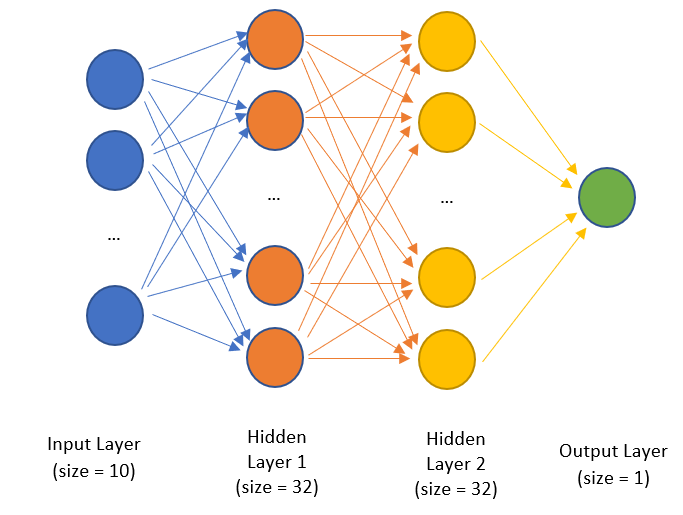

We will be setting the layers as followed:

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

Different activation function that can be applied:
- Sigmoid Function (A function which ‘squeezes’ all the initial output to be between 0 and 1)
- tanh Function (A function which ‘squeezes’ all the initial output to be between -1 and 1)
- ReLU Function (If the initial output is negative, then output 0. If not, do nothing to the initial output)

In [15]:
# importing keras that will be used to set the architecture 
from keras.models import Sequential
from keras.layers import Dense

We will be setting the model layers

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), #32 is the size of the first layer, & 10 referes to the 10 input features
    Dense(32, activation='relu'), #32 is the size of the first layer
    Dense(1, activation='sigmoid'), #1 neuron as output layer for the prediction
])

## 2.2.  Configuring & Training the Model

The architecture for the model has been set but we still need to configure the model. These configurations include:
- what optimizer will be used such as SGD & Adam.
- what lost function will be used? (first checking if it is for Probabilistic or regression losses) such as BinaryCrossentropy & CategoricalCressentropy.
- what other metrics will like to be tracker such as Accuray & MeanSquaredError.

In this section we will be conducting the followed steps:
1. Specify some hyper-parameters (the template)
2. Train on the training dataset (filling in the parameters)
3. Record the validation loss
4. Applying confusion matrix on the output
5. conclusion

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy', #chosen for our binary output
              metrics=['accuracy'])

<b>Time to train the model</b>

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 11ms/step - loss: 0.6930 - accuracy: 0.4980 - val_loss: 0.6836 - val_accuracy: 0.5068
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6814 - accuracy: 0.4980 - val_loss: 0.6743 - val_accuracy: 0.5068
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.5010 - val_loss: 0.6664 - val_accuracy: 0.5114
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6640 - accuracy: 0.5098 - val_loss: 0.6605 - val_accuracy: 0.5571
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6585 - accuracy: 0.5577 - val_loss: 0.6560 - val_accuracy: 0.6575
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6526 - val_loss: 0.6517 - val_accuracy: 0.7306
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.7094 - val_loss: 0.6473 - val_accuracy: 0.7489
Epoch 8/100


<b>Evaluating the model</b>

In [19]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2777 - accuracy: 0.9087


[0.2777245044708252, 0.9086757898330688]

### Summary of the model
- setting up the architecture with keras. This included the input layer, 2 hidden layers and 1 output layer.
- compiling the model by seeting the settings of the model (optimizer, loss function & metrics)
- training the model and finding the best fit parameters with using the validation data.
- evaluating the nodel on the test dataset.

## 2.3. Visualizing Loss and Accuracy
THis chapter will be focussed on visualizing the training loss and validation loss to see how our model trained.
We will be looking how well our model performs and if we have overfitted.
Overfitting occurs when the model has fitted so well to the training dataset that it has failed to generalize to unseen examples. This is characterized by a high dev (validation) loss and a low train loss, and can be addressed with regularization techniques.
These techniques can be see as adding regularization, early stopping or dropout.

In [20]:
# Needed imports
import matplotlib.pyplot as plt

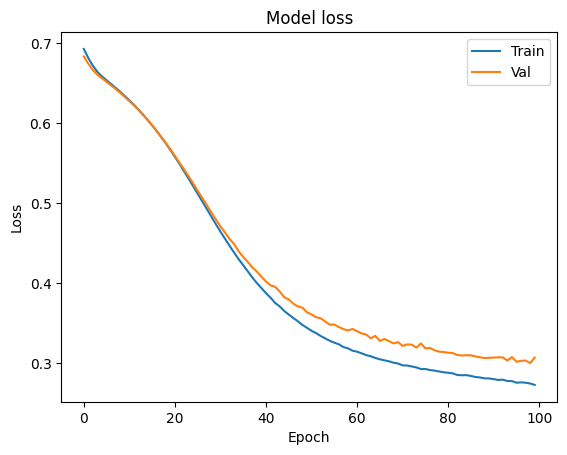

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Next we will be plotting the training accuracy and validation accuracy

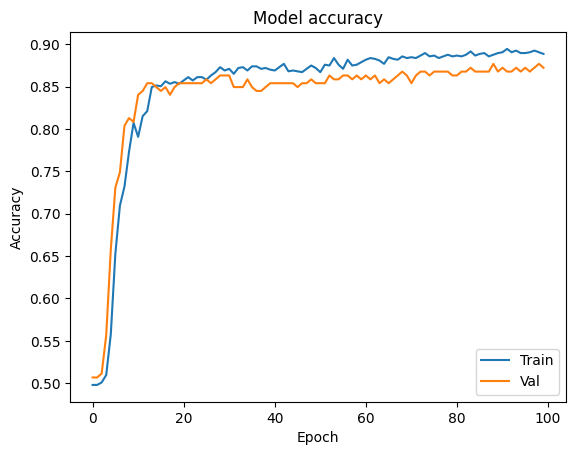

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

the plot above shows the model's accuracy for the training and validation set

## 2.4 Confusion Matrix

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [24]:
Y_pred = model.predict(X_test)
y_pred = np.round(Y_pred, 0).tolist()

7/7 [==============================] - 0s 3ms/step


In [25]:
confusion_matrix(Y_test, y_pred)

array([[100,  11],
       [  9,  99]], dtype=int64)

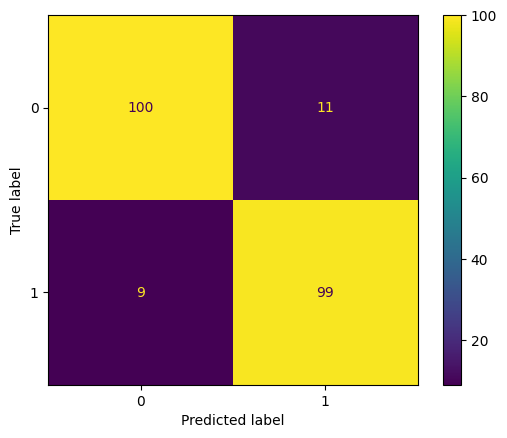

In [26]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [27]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       111
           1       0.90      0.92      0.91       108

    accuracy                           0.91       219
   macro avg       0.91      0.91      0.91       219
weighted avg       0.91      0.91      0.91       219



# 3. Hypertuning the model
In this section we will be hypertuning the optimizer and loss function for the model to see if it will perform better or worse and why.

## 3.1. Hypertuning the model optimizers
In this chapter we will use the same steps for setting up the neural network but play around with the hyper paramters to see if we can get a better model by evaluating the loss and accuracy.

In this section we will be training and hypertuning the model to find the best results. The steps will go as followed:
1. Specify some hyper-parameters (the template)
2. Train on the training dataset (filling in the parameters)
3. Applying confusion matrix on the output
4. Record the validation loss
5. Repeat Steps 1 to 3 with a different set of hyper-parameters (many times)
6. Conclusion

### 3.1.1 Using Adam as optimizer
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

<b>Neural Network Architecture</b>

In [28]:
model_2 = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), #32 is the size of the first layer, & 10 referes to the 10 input features
    Dense(32, activation='relu'), #32 is the size of the first layer
    Dense(1, activation='sigmoid'), #1 neuron as output layer for the prediction
])

In [29]:
model_2.compile(optimizer='Adam',
              loss='binary_crossentropy', #chosen for our binary output
              metrics=['accuracy'])

<b>Training the Model</b>

In [30]:
hist_test_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6737 - accuracy: 0.5783 - val_loss: 0.6570 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.6135 - val_loss: 0.6221 - val_accuracy: 0.6941
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5958 - accuracy: 0.7524 - val_loss: 0.5658 - val_accuracy: 0.7717
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.8190 - val_loss: 0.4973 - val_accuracy: 0.8311
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4565 - accuracy: 0.8454 - val_loss: 0.4354 - val_accuracy: 0.8493
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3979 - accuracy: 0.8601 - val_loss: 0.3942 - val_accuracy: 0.8402
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3601 - accuracy: 0.8611 - val_loss: 0.3702 - val_accuracy: 0.8402
Epoch 8/100
3

<b>Evaluating the Model</b>

In [31]:
model_2.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2356 - accuracy: 0.9132


[0.23562783002853394, 0.913241982460022]

<b>Confusion Matrix</b>

In [32]:
Y_pred = model_2.predict(X_test).round()
y_pred = np.round(Y_pred, 0).tolist()
confusion_matrix(Y_test, y_pred)

7/7 [==============================] - 0s 2ms/step


array([[ 99,  12],
       [  7, 101]], dtype=int64)

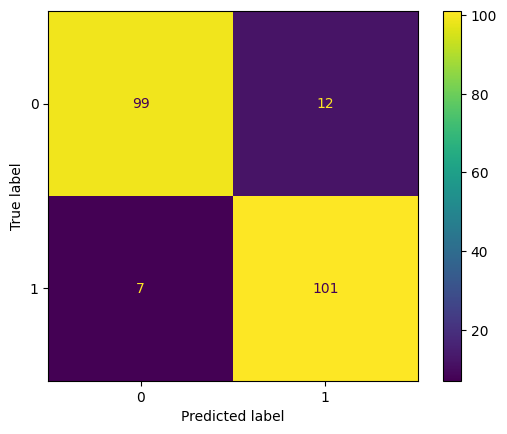

In [33]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [34]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       111
           1       0.89      0.94      0.91       108

    accuracy                           0.91       219
   macro avg       0.91      0.91      0.91       219
weighted avg       0.91      0.91      0.91       219



<b>Visualizing Loss</b>

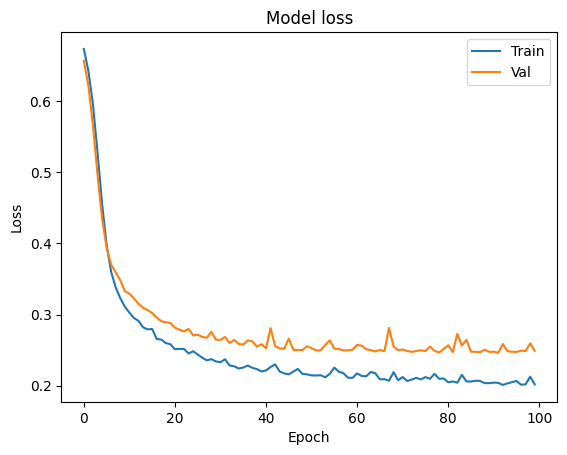

In [35]:
plt.plot(hist_test_2.history['loss'])
plt.plot(hist_test_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

<b>Visualizing Accuracy</b>

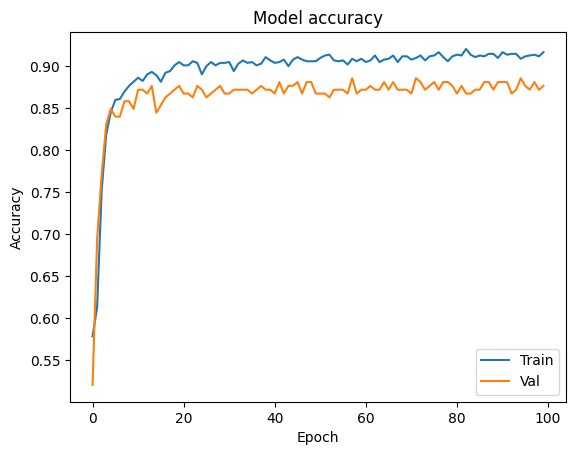

In [36]:
plt.plot(hist_test_2.history['accuracy'])
plt.plot(hist_test_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### 3.1.2 Using RMSprop as optimizer
The gist of RMSprop is to:
- Maintain a moving (discounted) average of the square of gradients
- Divide the gradient by the root of this average

<b>Neural Network Architecture</b>

In [37]:
model_3 = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), #32 is the size of the first layer, & 10 referes to the 10 input features
    Dense(32, activation='relu'), #32 is the size of the first layer
    Dense(1, activation='sigmoid'), #1 neuron as output layer for the prediction
])

In [38]:
model_3.compile(optimizer='RMSprop',
              loss='binary_crossentropy', #chosen for our binary output
              metrics=['accuracy'])

<b>Training the Model</b>

In [39]:
hist_test_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6681 - accuracy: 0.5489 - val_loss: 0.6447 - val_accuracy: 0.7489
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6225 - accuracy: 0.7779 - val_loss: 0.6033 - val_accuracy: 0.7534
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5704 - accuracy: 0.8082 - val_loss: 0.5474 - val_accuracy: 0.8356
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5131 - accuracy: 0.8278 - val_loss: 0.4996 - val_accuracy: 0.8037
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4607 - accuracy: 0.8337 - val_loss: 0.4545 - val_accuracy: 0.8037
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4170 - accuracy: 0.8552 - val_loss: 0.4208 - val_accuracy: 0.8493
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3876 - accuracy: 0.8552 - val_loss: 0.3974 - val_accuracy: 0.8447
Epoch 8/100
3

<b>Evaluating the Model</b>

In [40]:
model_3.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2582 - accuracy: 0.8950


[0.25815895199775696, 0.8949771523475647]

<b>Confusion Matrix</b>

In [41]:
Y_pred = model_3.predict(X_test).round()
y_pred = np.round(Y_pred, 0).tolist()
confusion_matrix(Y_test, y_pred)

7/7 [==============================] - 0s 2ms/step


array([[ 93,  18],
       [  5, 103]], dtype=int64)

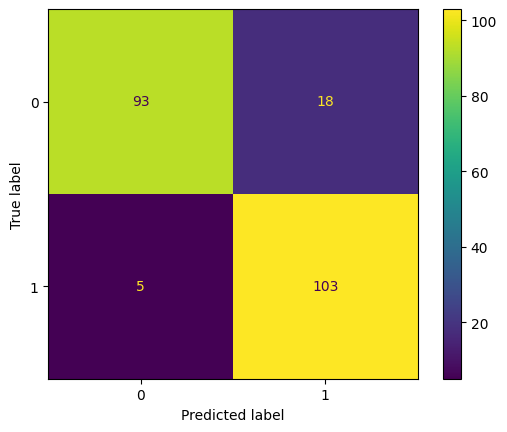

In [42]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [43]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       111
           1       0.85      0.95      0.90       108

    accuracy                           0.89       219
   macro avg       0.90      0.90      0.89       219
weighted avg       0.90      0.89      0.89       219



<b>Visualizing Loss</b>

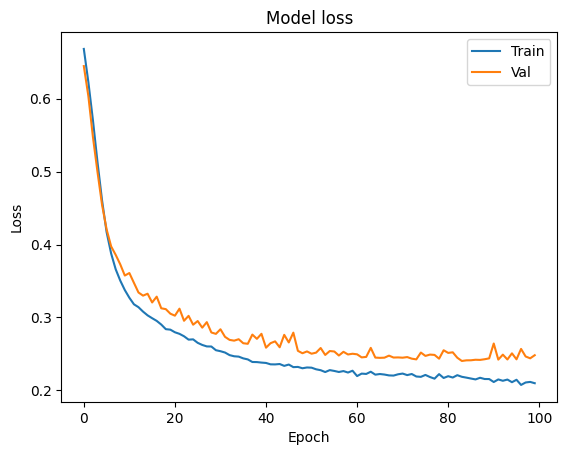

In [44]:
plt.plot(hist_test_3.history['loss'])
plt.plot(hist_test_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

<b>Visualizing Accuracy</b>

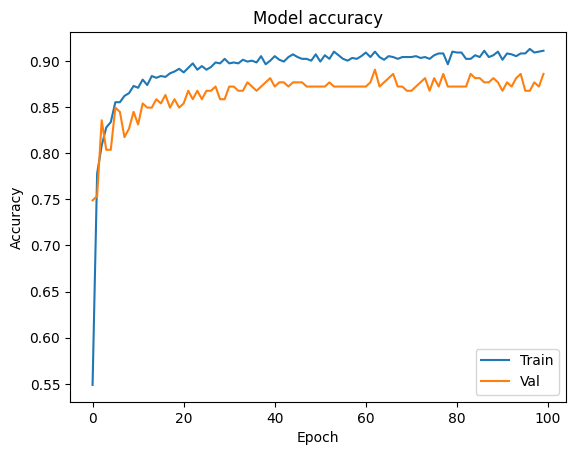

In [45]:
plt.plot(hist_test_3.history['accuracy'])
plt.plot(hist_test_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### 3.1.3. Conclusion
We have tried out 2 different optimizers (Adam & RMSprop) to compare to the SGD optimizer.
Based on the finding, all three give a similiar overal accuracy with the RMSprop being the highest and for the loss section are they all again quite even with the Adam optimizer having the lowest loss.
SGD is well known to perform better than Adam with also outperformances on the training data but in our case we had a slight better output with Adam for our dataset and how the model is set up.
Lastly, Adam does perform better but if we visualize the loss on the plots compared to SGD, we see that SGD has a even distribution comparing both lines whereas Adam's plots differentiate for each epoch.
Lastly, based on the confusion matrix the SGD did better where we would rather have more false positives than false negatives.

## 3.2. Hypertuning the model loss functions
In this chapter we will use the same steps for setting up the neural network but play around with the hyper paramters to see if we can get a better model by evaluating the loss and accuracy.

We will be following 4 steps:
1. Specify some hyper-parameters (the template)
2. Train on the training dataset (filling in the parameters)
3. Record the validation loss
4. Repeat Steps 1 to 3 with a different set of hyper-parameters (many times)

### 3.2.1 Using CategoricalHinge as loss
Computes the categorical hinge loss between y_true & y_pred.

<b>Neural Network Architecture</b>

In [46]:
model_4 = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), #32 is the size of the first layer, & 10 referes to the 10 input features
    Dense(32, activation='relu'), #32 is the size of the first layer
    Dense(1, activation='sigmoid'), #1 neuron as output layer for the prediction
])

In [47]:
model_4.compile(optimizer='sgd',
              loss='CategoricalHinge', #chosen for our binary output
              metrics=['accuracy'])

<b>Training the Model</b>

In [48]:
hist_test_4 = model_4.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 12ms/step - loss: 1.0002 - accuracy: 0.4980 - val_loss: 0.9909 - val_accuracy: 0.5023
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9991 - accuracy: 0.5059 - val_loss: 0.9898 - val_accuracy: 0.5068
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9979 - accuracy: 0.5078 - val_loss: 0.9887 - val_accuracy: 0.5068
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9968 - accuracy: 0.5059 - val_loss: 0.9876 - val_accuracy: 0.5068
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9957 - accuracy: 0.5059 - val_loss: 0.9866 - val_accuracy: 0.5114
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9945 - accuracy: 0.5127 - val_loss: 0.9855 - val_accuracy: 0.5205
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9934 - accuracy: 0.5157 - val_loss: 0.9844 - val_accuracy: 0.5342
Epoch 8/100


<b>Evaluating the Model</b>

In [49]:
model_4.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.8813


[0.6999451518058777, 0.8812785148620605]

<b>Confusion Matrix</b>

In [50]:
Y_pred = model_4.predict(X_test).round()
y_pred = np.round(Y_pred, 0).tolist()
confusion_matrix(Y_test, y_pred)

7/7 [==============================] - 0s 3ms/step


array([[ 93,  18],
       [  8, 100]], dtype=int64)

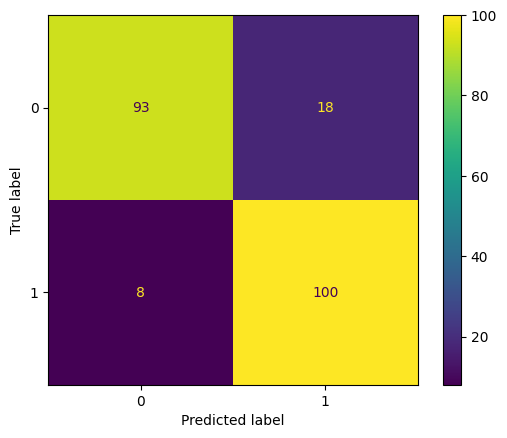

In [51]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [52]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       111
           1       0.85      0.93      0.88       108

    accuracy                           0.88       219
   macro avg       0.88      0.88      0.88       219
weighted avg       0.88      0.88      0.88       219



<b>Visualizing Loss</b>

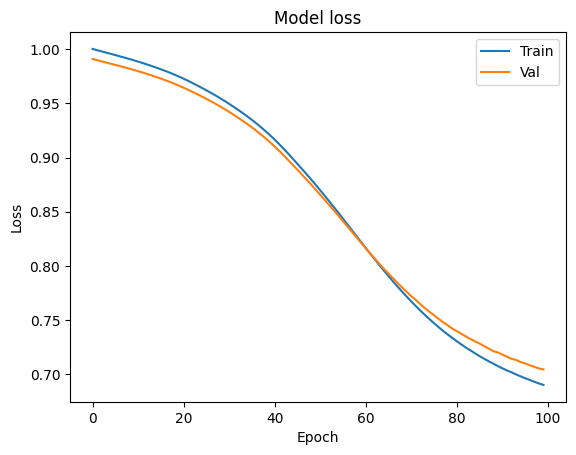

In [53]:
plt.plot(hist_test_4.history['loss'])
plt.plot(hist_test_4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

<b>Visualizing Accuracy</b>

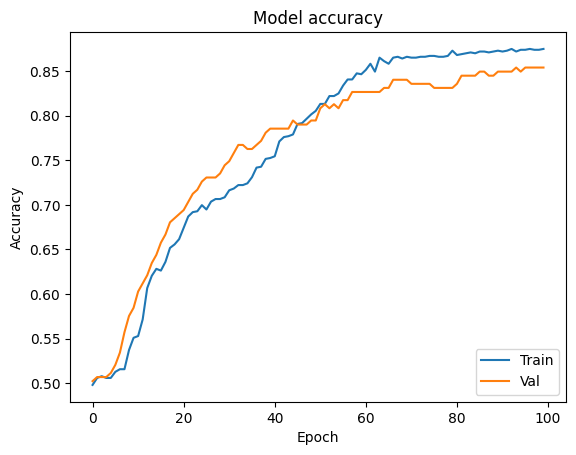

In [54]:
plt.plot(hist_test_4.history['accuracy'])
plt.plot(hist_test_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### 3.2.2 Using poisson as loss
Computes the Poisson loss between y_true and y_pred.

<b>Neural Network Architecture</b>

In [55]:
model_5 = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), #32 is the size of the first layer, & 10 referes to the 10 input features
    Dense(32, activation='relu'), #32 is the size of the first layer
    Dense(1, activation='sigmoid'), #1 neuron as output layer for the prediction
])

In [56]:
model_5.compile(optimizer='sgd',
              loss='poisson', #chosen for our binary output
              metrics=['accuracy'])

<b>Training the Model</b>

In [57]:
hist_test_5 = model_5.fit(X_train, Y_train,
          batch_size=32, epochs=200,
          validation_data=(X_val, Y_val))

Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 0.8460 - accuracy: 0.5538 - val_loss: 0.8523 - val_accuracy: 0.5297
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.8448 - accuracy: 0.5753 - val_loss: 0.8510 - val_accuracy: 0.5753
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.8435 - accuracy: 0.5812 - val_loss: 0.8498 - val_accuracy: 0.5753
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.8424 - accuracy: 0.5861 - val_loss: 0.8487 - val_accuracy: 0.5845
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.8414 - accuracy: 0.5959 - val_loss: 0.8478 - val_accuracy: 0.5890
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.8405 - accuracy: 0.6096 - val_loss: 0.8470 - val_accuracy: 0.6027
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.8399 - accuracy: 0.6370 - val_loss: 0.8463 - val_accuracy: 0.6210
Epoch 8/200
3

<b>Evaluating the Model</b>

In [58]:
model_5.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.8767


[0.6165306568145752, 0.8767123222351074]

<b>Confusion Matrix</b>

In [59]:
Y_pred = model_5.predict(X_test).round()
y_pred = np.round(Y_pred, 0).tolist()
confusion_matrix(Y_test, y_pred)

7/7 [==============================] - 0s 2ms/step


array([[97, 14],
       [13, 95]], dtype=int64)

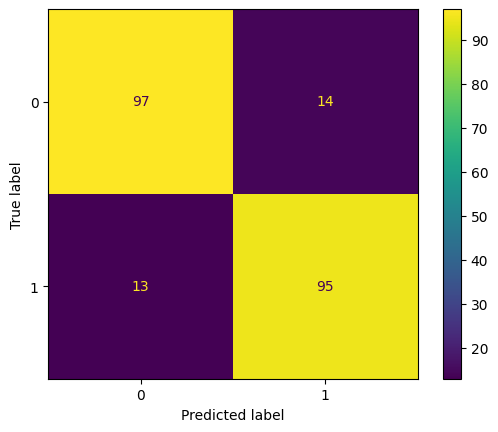

In [60]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [61]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       111
           1       0.87      0.88      0.88       108

    accuracy                           0.88       219
   macro avg       0.88      0.88      0.88       219
weighted avg       0.88      0.88      0.88       219



<b>Visualizing Loss</b>

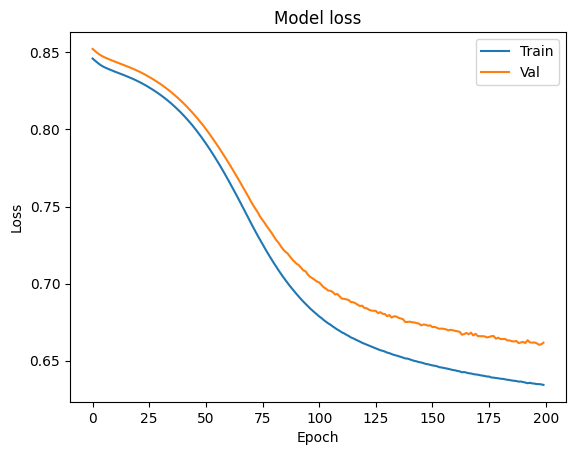

In [62]:
plt.plot(hist_test_5.history['loss'])
plt.plot(hist_test_5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

<b>Visualizing Accuracy</b>

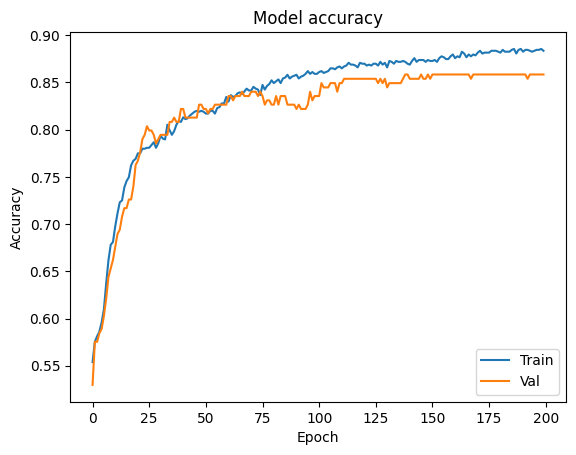

In [63]:
plt.plot(hist_test_5.history['accuracy'])
plt.plot(hist_test_5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### 3.2.3. Conclusion
We have tried out 2 different loss function to compare to the Binary Crossentropy function which are the poisson and categorical hinge functions.
Based on the finding, all three give a similiar overal accuracy but comparing the losses which they are, the Binary Crossentropy function performs the best out of the 3 for this data. 

## 3.3. Conclusion on Hypertuning the model
Based on hypertuning the loss function and optimizers we can conclude that the original set hyperparamaters used (Binary Crossentropy & SGD) were the best in comparison to the hyperparameters tried onto the model.
The results overall with hypertuning the model came close but were the best ones being the orginal set hyper parameters which we have concluded based on looking at the loss, accuracy and confusion matrixes.

# Reflection
To reflect on this exercise, I have learned how to apply my knowledge and skills in creating a neural network on a random dataset. Although I encountered some difficulties, such as applying the confusion matrix and optimizers, I persisted and eventually gained a better understanding of these concepts.

Additionally, I gained knowledge on new techniques such as Regularization, Early Stopping & Dropout to prevent overfitting of the neural network. Although my neural network in this exercise did not suffer from overfitting, I now have a better understanding of how to address this issue if it were to occur in the future.

Overall, this exercise has provided me with valuable experience and knowledge that I can apply in future projects involving neural networks and machine learning.

# Sources
data source that the project is based on: https://www.kaggle.com/c/zillow-prize-1/data

reformed data source: https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view

tutorial/code used to help: https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

Helped to set the prediction of the neural network to the right format tot use with also sigmoid included: https://stackoverflow.com/questions/73199505/confusion-matrix-for-binary-classification-with-nn 

Steps used for applying the confusion matrix: https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/